<a href="https://colab.research.google.com/github/drpetros11111/DeepUnderstanding_DL/blob/ANN_Linear-Regression_pytorch-%26-tf/DUDL_ANN_multioutput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Multi-output ANN (iris dataset)
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

# Import Torch and other libaries

In [1]:
# import libraries
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import Tensorflow and other libaries

In [5]:
# some plots to show the data
# import libraries
import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

plt.show()

<ipython-input-5-50dbf0c47090>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


# Explanation of matplotlib formats and 'svg'
This line imports the set_matplotlib_formats function from the IPython.display module.

This function is specifically designed to change the output format of Matplotlib plots in Jupyter environments.

------------------------
# 1. Setting the Output Format

    set_matplotlib_formats('svg')

This line sets the default output format for Matplotlib figures to SVG (Scalable Vector Graphics).

----------------------------
#Explanation of SVG:
SVG is a vector graphics format that is resolution-independent.

This means that SVG images can be scaled to any size without losing quality, making them ideal for detailed and high-quality visualizations.

By setting the format to SVG, you ensure that any plots generated by Matplotlib will be displayed in this high-quality format when you use them in Jupyter Notebooks.

-------------------------
#Why Use This Setting?
##Clarity and Quality:
SVG renders cleaner and sharper images compared to raster formats like PNG or JPEG, especially for detailed plots and figures.

##Interactive Features:
Some SVG plots can be interactive, allowing for better user engagement.

##Consistency:
Using SVG ensures that your visualizations look consistent across different sizes and displays.

------------------------
#svg is used in the colab environmet as well
SVG (Scalable Vector Graphics) is supported in Google Colab, just like in Jupyter Notebooks.

When you use Matplotlib to create plots in Colab and set the output format to SVG, the plots will be rendered in that format.

##How to Use SVG in Google Colab:
Import Libraries: Make sure to import the necessary libraries and set the output format:

    import matplotlib.pyplot as plt
    from IPython.display import set_matplotlib_formats

# Set the output format to SVG
    set_matplotlib_formats('svg')

Create Plots: You can then create your plots as usual:


# Import and process the data

In [6]:
# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

### NOTE: As of Jan 2024, there seems to be an error with colab accessing the seaborn sample data.
# If the code above gives an error, use the following two lines instead.
#import pandas as pd
#iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')


# check out the first few lines of data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# organize the data

# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)

# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])


# 1. Organizing the Data
The first comment indicates that the goal is to organize the data.

This typically involves preparing the dataset for input into a machine learning model.

---------------------------------
#2. Converting from a Pandas DataFrame to a Tensor

    data = torch.tensor(iris[iris.columns[0:4]].values).float()

##iris:

This is likely a Pandas DataFrame containing the Iris dataset, which includes features such as sepal length, sepal width, petal length, and petal width.

##iris.columns[0:4]:

This selects the first four columns of the DataFrame, which typically correspond to the feature columns (the measurements).

##.values:

This converts the selected columns into a NumPy array.

##torch.tensor(...):

This converts the NumPy array into a PyTorch tensor, which is the format required for input to PyTorch models.

##.float():

This converts the tensor to a floating-point type, which is commonly used for model training.

----------------------
#3. Transforming Species to Numbers
    labels = torch.zeros(len(data), dtype=torch.long)

##torch.zeros(len(data), dtype=torch.long):

This initializes a tensor called labels filled with zeros, with the same length as the data tensor.

The dtype=torch.long indicates that the tensor will hold integer values.

This tensor will be used to store the numerical representation of the species labels.

--------------------------
#4. Assigning Numeric Labels for Species

    labels[iris.species=='setosa'] = 0 # don't need!
    labels[iris.species=='versicolor'] = 1
    labels[iris.species=='virginica'] = 2

The first line (commented out) suggests that the code was initially set to assign 0 for "setosa" species but was removed as it is unnecessary.

This may be due to the fact that the species "setosa" is implicitly represented by the zeros already initialized in the labels tensor.

The next lines assign numeric labels to the other two species:
    Versicolor is assigned 1.
    Virginica is assigned 2.

--------------------
#Summary of Labels
After this code snippet, the labels tensor will contain:

    0 for all samples of the species "setosa".
    1 for samples of the species "versicolor".
    2 for samples of the species "virginica".

The overall purpose of this code snippet is to prepare the Iris dataset by:

Converting feature data from a Pandas DataFrame to a PyTorch tensor for model input.

Transforming categorical species labels into numeric format suitable for classification tasks, where each species corresponds to a different class.

This preparation is crucial for training machine learning models, as they require numerical input and labels for supervised learning.

# Create the ANN model

In [8]:
# model architecture
ANNiris = nn.Sequential(
    nn.Linear(4,64),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(64,64),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(64,3),   # output layer
      )

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

# Define the model architecture in pyTorch
nn.Sequential: This is a PyTorch module that allows you to define a neural network in a sequential manner. Each layer is added in the order it is defined.

--------------------------------
## 1. Layer Breakdown:
    nn.Linear(4, 64):

This is the input layer.

It takes 4 features (the input dimensions from the Iris dataset) and maps them to 64 neurons. T

The Linear layer performs a linear transformation of the input data.

##nn.ReLU():

This is an activation function.

ReLU (Rectified Linear Unit) introduces non-linearity into the model by outputting the input directly if it is positive; otherwise, it outputs zero. T

his helps the network learn complex patterns.

##nn.Linear(64, 64):

This is a hidden layer with 64 neurons. It takes the output from the previous ReLU activation (which has 64 units) and also outputs 64 units.

##Another nn.ReLU():

Another activation function applied after the second hidden layer to add non-linearity.

##nn.Linear(64, 3):

This is the output layer.

It takes the 64 neurons from the last hidden layer and maps them to 3 output units, corresponding to the three classes (species of the Iris dataset: setosa, versicolor, virginica).

-----------------------------------
#2. Loss Function

    lossfun = nn.CrossEntropyLoss()
##nn.CrossEntropyLoss():
This is the loss function used for multi-class classification problems.

It combines LogSoftmax and NLLLoss in one single class.

It calculates the loss between the predicted probabilities (output of the model) and the true class labels (the numeric labels you set up earlier).

The loss function measures how well the model's predictions match the actual labels. During training, the model will attempt to minimize this loss.

--------------------------
#3. Optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=.01)
##torch.optim.SGD:

This initializes the Stochastic Gradient Descent (SGD) optimizer, which is used to update the model's weights during training based on the computed gradients.

##ANNiris.parameters():
This gets the parameters (weights and biases) of the model to be optimized.

##lr=.01:
This sets the learning rate to 0.01.

The learning rate controls how much to change the model's weights with respect to the loss gradient during optimization.

A smaller learning rate can lead to more precise convergence, while a larger one can speed up training but might overshoot the optimal weights.

----------------------
#Summary
The code defines a simple feedforward neural network architecture with:

An input layer with 4 features,

One hidden layer with 64 neurons,

An output layer with 3 classes.

It specifies a loss function suitable for multi-class classification (cross-entropy loss).

It sets up an SGD optimizer to update the model's parameters during training.

This setup is typical for training a neural network to classify data, like the Iris dataset.

----------------------------
-----------------------------
#Note:
In this code snippet, the output layer does not explicitly use a softmax activation function because the nn.CrossEntropyLoss() function in PyTorch combines two key operations: softmax and negative log likelihood loss (NLLLoss).

Here's a breakdown of why this is the case:

--------------------------------------
##1. Cross Entropy Loss with Logits
nn.CrossEntropyLoss() expects the raw output from the model (often called logits) rather than probabilities.

This means the output layer can directly provide the unnormalized scores for each class.

The softmax function transforms these logits into probabilities, but this transformation is integrated into the cross-entropy loss function itself.

##2. Efficiency
By not applying softmax in the model and instead relying on the cross-entropy loss function to do it, you avoid an unnecessary computation.

The cross-entropy loss function computes the softmax internally, which is both more efficient and numerically stable.

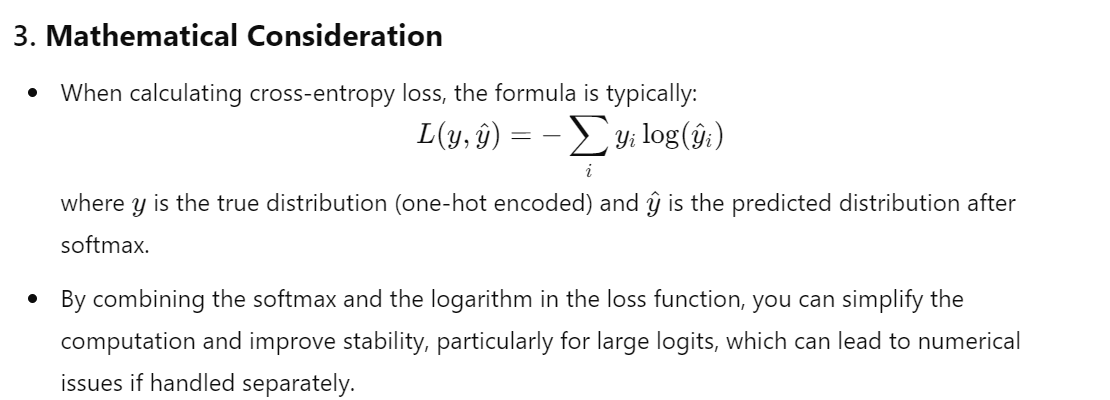

-----------------------------
#4. Conclusion
Thus, the omission of an explicit softmax activation in the output layer is intentional and aligns with PyTorch's design.

When using nn.CrossEntropyLoss(), you provide the raw outputs (logits) from the last linear layer directly, and the loss function takes care of applying softmax and computing the loss in a numerically stable way.

This is a common practice in many deep learning frameworks and helps streamline the model architecture while maintaining efficiency.

# Train the model

In [9]:
numepochs = 1000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

  # forward pass
  yHat = ANNiris(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
  ongoingAcc.append( accuracyPct )              # add to list of accuracies



# final forward pass
predictions = ANNiris(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

# Train the model

---------------------------
# 1. Initialization

    numepochs = 1000

# initialize losses
    losses = torch.zeros(numepochs)
    ongoingAcc = []

##numepochs:
This variable sets the number of times the entire dataset will be passed through the neural network during training.

Here, it's set to 1000 epochs.


##losses:

This tensor is initialized to store the loss values for each epoch.

##ongoingAcc:

This list is used to keep track of accuracy values at each epoch.

-------------------
#2. Training Loop

    for epochi in range(numepochs)

This loop iterates over each epoch, allowing the model to learn from the data repeatedly.

---------------
#Inside the Loop:
##2.1. Forward Pass

    yHat = ANNiris(data)
##yHat:

This variable holds the predicted output (logits) from the neural network for the input data.

It represents the model's raw predictions before applying softmax.

---------------------
#2.2. Compute Loss

    loss = lossfun(yHat, labels)
    losses[epochi] = loss

##loss:
The loss is calculated by comparing the predicted outputs (yHat) with the true labels (labels) using the defined loss function (CrossEntropyLoss).

The computed loss is stored in the losses tensor for tracking over epochs.

------------------
#2.3. Backpropagation

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

##optimizer.zero_grad():

This clears the gradients of all optimized tensors.

Gradients accumulate by default in PyTorch, so this step is crucial to ensure that gradients from the previous epoch do not affect the current one.

##The optimizer.zero_grad() function is called at the beginning of each epoch within the training loop.

This is important for the following reasons:

###1. Gradient Accumulation in PyTorch
In PyTorch, gradients are accumulated by default.

This means that every time you call loss.backward(), the gradients for the parameters are added to the existing gradients.

If you don’t clear the gradients at the beginning of each epoch, the gradients from the previous iterations will still be present, leading to incorrect updates.


###2. Ensuring Correct Updates
By calling optimizer.zero_grad() at the start of each epoch, you ensure that the gradients are reset to zero before computing the new gradients for the current batch of data.

This allows the model to make updates based only on the current loss, preventing any interference from past updates.

So, in the context of your training loop, optimizer.zero_grad() is indeed called every epoch (specifically, at the start of each iteration of the loop).

This ensures that each forward and backward pass is independent and based solely on the current batch of data, allowing the optimizer to correctly update the model parameters.


##loss.backward():

This computes the gradient of the loss with respect to the model parameters.

It performs backpropagation, calculating how much each parameter should change to reduce the loss.

##optimizer.step():

This updates the model parameters (weights and biases) based on the computed gradients.

------------------------
#2.4. Compute Accuracy

    matches = torch.argmax(yHat, axis=1) == labels # booleans (false/true)
    matchesNumeric = matches.float()              # convert to numbers (0/1)

    accuracyPct = 100 * torch.mean(matchesNumeric)  # average and x100

    ongoingAcc.append(accuracyPct)              # add to list of accuracies

##torch.argmax(yHat, axis=1):

This returns the index of the class with the highest predicted score for each sample, effectively giving the predicted class labels.

##matches:

This creates a boolean tensor comparing the predicted labels to the true labels.

##matchesNumeric:

This converts the boolean values to floating-point numbers (0 for False, 1 for True).

##accuracyPct:

The accuracy is calculated as the mean of the numeric matches (the proportion of correct predictions) multiplied by 100 to express it as a percentage.

The computed accuracy for the epoch is appended to the ongoingAcc list.

------------------------
#3. Final Forward Pass

    predictions = ANNiris(data)
    predlabels = torch.argmax(predictions, axis=1)

    totalacc = 100 * torch.mean((predlabels == labels).float())

After training for all epochs, a final forward pass is performed on the entire dataset to obtain predictions.

##predlabels:

This variable holds the final predicted class labels after applying argmax to the output logits.

##totalacc:

The overall accuracy of the model on the dataset is calculated by comparing the final predictions with the true labels, similar to the accuracy calculation in the loop.

----------------------
#Summary
This code snippet performs the following tasks during the training of the neural network:

Initializes variables to track loss and accuracy.
Iteratively performs forward passes to compute predictions.

Calculates the loss and updates the model parameters using backpropagation.

Computes and tracks accuracy for each epoch.

After training, it evaluates the model's performance on the training data to determine the final accuracy.

This complete training loop is essential for training a machine learning model effectively.

In [10]:
torch.argmax(yHat,axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Identify the index of the maximum value along a specified axis
The function torch.argmax(yHat, axis=1) is used to identify the index of the maximum value along a specified axis (or dimension) of a tensor.

In the context of neural networks and classification tasks, here's a breakdown of its components:

----------------------
#Breakdown
##yHat:

This is typically the output of a neural network, often referred to as the logits (raw scores before applying any activation function like softmax).

In a multi-class classification problem, yHat will usually have a shape of (batch_size, num_classes), where each row corresponds to a different input sample and each column corresponds to the score for a particular class.
torch.argmax(..., axis=1):

##torch.argmax():

This function returns the index of the maximum value in the input tensor along the specified dimension.

##axis=1:
This specifies that the operation should be performed along the rows (i.e., for each input sample).

If you think of yHat as a 2D tensor, where each row represents the output for a different sample, setting axis=1 means that for each row, it will find the index of the maximum value.

----------------------------
#Example
Consider a sample tensor yHat:

    yHat = [[1.0, 2.0, 0.5],   # Sample 1
            [0.1, 0.4, 0.3],   # Sample 2
            [0.5, 1.0, 0.8]]   # Sample 3

The shape of yHat is (3, 3), meaning there are 3 samples and 3 classes.

Using torch.argmax(yHat, axis=1) would yield:

    tensor([1, 1, 1])

-----------------------
#Interpretation of Output
The output indicates that for each of the three samples, the index of the maximum value is 1, which corresponds to the second class (if classes are indexed as 0, 1, and 2).

Thus, this operation effectively gives you the predicted class label for each input sample based on the maximum score.

--------------------------
#Summary
In the context of a classification model, torch.argmax(yHat, axis=1) is used to extract the predicted class labels for a batch of inputs by identifying which class has the highest score (logit) for each sample.

This is a crucial step in evaluating model predictions and calculating accuracy.

# Visualize the results

Final accuracy: 98%


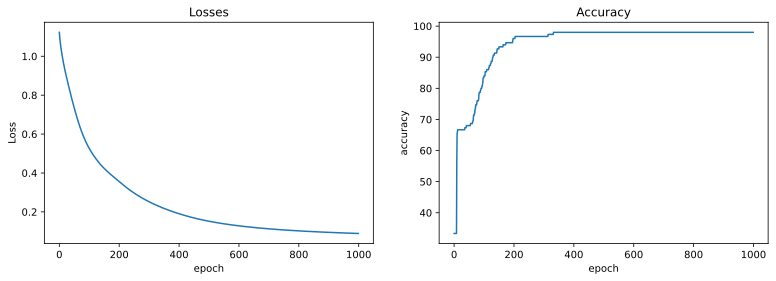

In [11]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

In [6]:
import torch.nn as nn # import the torch.nn module and alias it as nn
import torch # import the torch module

# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)

# create a dummy variable called yHat
yHat = torch.rand(3,5)

torch.sum(sm(yHat),axis=1)

tensor([1.0000, 1.0000, 1.0000])

In [7]:
# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(sm(yHat),axis=1)

tensor([1.0000, 1.0000, 1.0000])

In [8]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(yHat.detach(),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

# try it again without the softmax!

NameError: name 'plt' is not defined

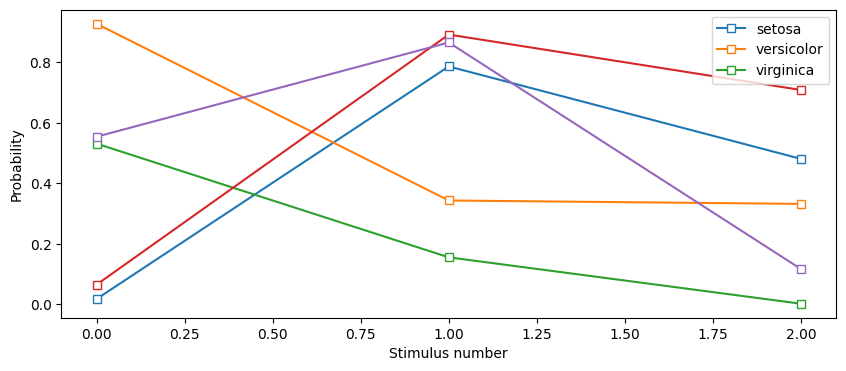

In [9]:
import matplotlib.pyplot as plt # import the matplotlib.pyplot module and alias it as plt

# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(yHat.detach(),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

# try it again without the softmax!

# Additional explorations

In [ ]:
# 1) When the loss does not reach an asymptote, it's a good idea to train the model for more epochs. Increase the number of
#    epochs until the plot of the losses seems to hit a "floor" (that's a statistical term for being as small as possible).
#
# 2) We used a model with 64 hidden units. Modify the code to have 16 hidden units. How does this model perform? If there
#    is a decrease in accuracy, is that decrease distributed across all three iris types, or does the model learn some
#    iris types and not others?
#
# 3) Write code to compute three accuracy scores, one for each iris type. In real DL projects, category-specific accuracies
#    are often more informative than the aggregated accuracy.
#